In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0.5053326657968706

## Implementing MLPs with Keras

In [10]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [12]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [14]:
# scale to between 0 and 1
X_train, X_valid, X_test = X_train / 255., X_valid/255., X_test / 255.

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Ankle boot'

In [46]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.layers

In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense_4'

In [27]:
model.get_layer('dense_4') is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04667422, -0.02563563, -0.04115143, ...,  0.01464008,
         0.06300399, -0.06962524],
       [ 0.01027448,  0.031678  , -0.05167736, ...,  0.04042189,
         0.03009679,  0.0002721 ],
       [-0.03665464, -0.03129032,  0.04198921, ...,  0.06804828,
         0.03572571,  0.06556804],
       ...,
       [ 0.04830761,  0.05639327, -0.00787202, ..., -0.01227861,
        -0.05147119,  0.05568461],
       [ 0.00347997,  0.05406012, -0.0287074 , ...,  0.05784695,
        -0.05102934, -0.07015156],
       [-0.00584203, -0.00199953, -0.02756925, ..., -0.01155933,
        -0.05130729,  0.00591334]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7207 - accuracy: 0.7635 - val_loss: 0.5079 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4877 - accuracy: 0.8310 - val_loss: 0.4666 - val_accuracy: 0.8360
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4405 - accuracy: 0.8459 - val_loss: 0.4253 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4157 - accuracy: 0.8545 - val_loss: 0.3994 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3948 - accuracy: 0.8630 - val_loss: 0.3970 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8671 - val_loss: 0.3952 - val_accuracy: 0.8610
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8703 - val_loss: 0.3744 - val_accuracy:

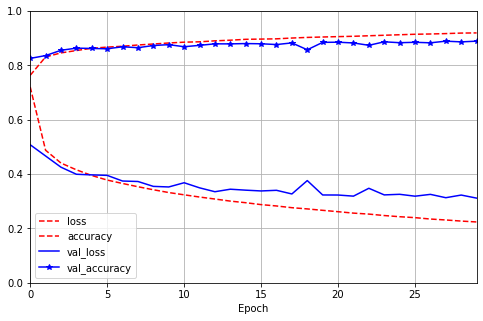

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--", "b-", "b-*"])
plt.show()

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8845


[0.32625430822372437, 0.8845000267028809]

In [51]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [53]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [54]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP Using the Sequential API

In [81]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model1 = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model1.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 8.6545 - root_mean_squared_error: 2.9419 - val_loss: 8.4221 - val_root_mean_squared_error: 2.9022
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.3055 - root_mean_squared_error: 2.8819 - val_loss: 8.3926 - val_root_mean_squared_error: 2.8972
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2850 - root_mean_squared_error: 2.8784 - val_loss: 8.4207 - val_root_mean_squared_error: 2.9020
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2767 - root_mean_squared_error: 2.8769 - val_loss: 8.4347 - val_root_mean_squared_error: 2.9044
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2677 - root_mean_squared_error: 2.8754 - val_loss: 8.3926 - val_root_mean_squared_error: 2.8972
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2590 - root_mean_squared_error: 2.8739 - val_loss: 8

In [82]:
mse_test, rmse_test = model1.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model1.predict(X_new)

1/1 [==============================] - 0s 183ms/step


## Building Complex Models Using the Functional API

In [64]:
# wide and deep network
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [65]:
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 8.4457 - root_mean_squared_error: 2.9062 - val_loss: 8.4159 - val_root_mean_squared_error: 2.9012
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2700 - root_mean_squared_error: 2.8757 - val_loss: 8.3758 - val_root_mean_squared_error: 2.8943
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2689 - root_mean_squared_error: 2.8756 - val_loss: 8.4573 - val_root_mean_squared_error: 2.9083
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2673 - root_mean_squared_error: 2.8753 - val_loss: 8.3930 - val_root_mean_squared_error: 2.8972
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2619 - root_mean_squared_error: 2.8744 - val_loss: 8.3938 - val_root_mean_squared_error: 2.8974
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2580 - root_mean_squared_error: 2.8737 - val_loss: 8

In [66]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
rmse_test

313/313 [==============================] - 1s 2ms/step - loss: 8.2511 - root_mean_squared_error: 2.8725


2.8724751472473145

In [69]:
# can send different portions of the features down different pahts
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [72]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_new[:, :5], X_new[:, 2:]

#norm_layer_wide.adapt(X_train_wide)
#norm_layer_deep.adapt(X_train_deep)
#history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
#                   validation_data=((X_valid_wide, X_valid_deep), y_valid))
#mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
#y_pred = model.predict((X_new_wide, X_new_deep))

In [73]:
# Can specify multiple outputs
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                      outputs=[output, aux_output])

In [76]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, 
             metrics=["RootMeanSquaredError"])

In [78]:
#norm_layer_wide.adapt(X_train_wide)
#norm_layer_deep.adapt(X_train_deep)
#history= model.fit(
#    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
#    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
#)

## Using the Subclassing API to Build Dynamic Models

In [79]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
    
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [83]:
model1.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


In [86]:
model2 = tf.keras.models.load_model("my_keras_model")
y_pred_main = model2.predict((X_new))

1/1 [==============================] - 0s 158ms/step


## Using Callbacks

In [87]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)
#history = model.fit([...], callbacks=[checkpoint_cb])

In [88]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
#history = model.fit([...], callbacks=[checkpoint_cb, early_stopping_cb])

In [89]:
# Custom Callbacks
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [91]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_d_%H_%M_%S")

run_logdir = get_run_logdir()

In [93]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100,200))
history = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), 
                     callbacks=[tensorboard_cb])

2022-11-10 10:12:42.314618: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-11-10 10:12:42.314641: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2022-11-10 10:12:42.315169: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


Epoch 1/20
 170/1719 [=>............................] - ETA: 4s - loss: 8.3071 - root_mean_squared_error: 2.8822

2022-11-10 10:12:43.319683: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-11-10 10:12:43.319701: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


 201/1719 [==>...........................] - ETA: 5s - loss: 8.3163 - root_mean_squared_error: 2.8838

2022-11-10 10:12:43.611975: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-11-10 10:12:43.643139: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-11-10 10:12:43.686510: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2022_11_d_10_10_15/plugins/profile/2022_11_10_10_12_43

2022-11-10 10:12:43.710272: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_logs/run_2022_11_d_10_10_15/plugins/profile/2022_11_10_10_12_43/Richards-MacBook-Pro.local.trace.json.gz
2022-11-10 10:12:43.729739: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2022_11_d_10_10_15/plugins/profile/2022_11_10_10_12_43

2022-11-10 10:12:43.730058: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to my_logs/run_2022_11_d_10_10_15/plugins

1719/1719 [==============================] - 5s 3ms/step - loss: 8.2462 - root_mean_squared_error: 2.8716 - val_loss: 8.3700 - val_root_mean_squared_error: 2.8933
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2427 - root_mean_squared_error: 2.8710 - val_loss: 8.3675 - val_root_mean_squared_error: 2.8929
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2448 - root_mean_squared_error: 2.8714 - val_loss: 8.3914 - val_root_mean_squared_error: 2.8969
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2439 - root_mean_squared_error: 2.8712 - val_loss: 8.3660 - val_root_mean_squared_error: 2.8926
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2429 - root_mean_squared_error: 2.8711 - val_loss: 8.3728 - val_root_mean_squared_error: 2.8938
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2431 - root_mean_squared_error: 2.8711 - val_loss: 8.3686 - val

In [94]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

In [96]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        
        data = (np.random.randn(100)+2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)